In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")


# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.aerial_building import aerial

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/mask_rcnn_coco_1.h5"  # TODO: update this path

C:\Users\Hamzah\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.


In [2]:
config = aerial.AerialConfig()
AERIAL_DIR = os.path.join(ROOT_DIR, "datasets/aerial")

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
dataset = aerial.AerialDataset()
dataset.load_aerial(AERIAL_DIR, "train")
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\datasets/aerial\train
<bound method Dataset.__init__ of <samples.aerial_building.aerial.AerialDataset object at 0x000002572E6EA208>>
Images: 38
Classes: ['BG', 'building', 'pool']


In [10]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,
                              config=config)

In [8]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
#weights_path = "/path/to/mask_rcnn_balloon.h5"

#weights_path = "/mask_rcnn_balloon.h5"
# Or, load the last model you trained

#weights_path = model.find_last()

weights_path = "D:/Hamzah/JobPrep/GPU_Projects/MapDataset/MatterPortGit/Mask_RCNN/mask_rcnn_coco_1.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True, exclude =[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
#exclude=
                  

#image_ids = next(os.walk(dataset_dir))[1]


#Have sloved:use”image_ids = os.listdir(dataset_dir)
#    ”replace” image_ids = next(os.walk(dataset_dir))[1]”

Loading weights  D:/Hamzah/JobPrep/GPU_Projects/MapDataset/MatterPortGit/Mask_RCNN/mask_rcnn_coco_1.h5


idx [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
-----
mask [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False F

AttributeError: 'list' object has no attribute 'shape'

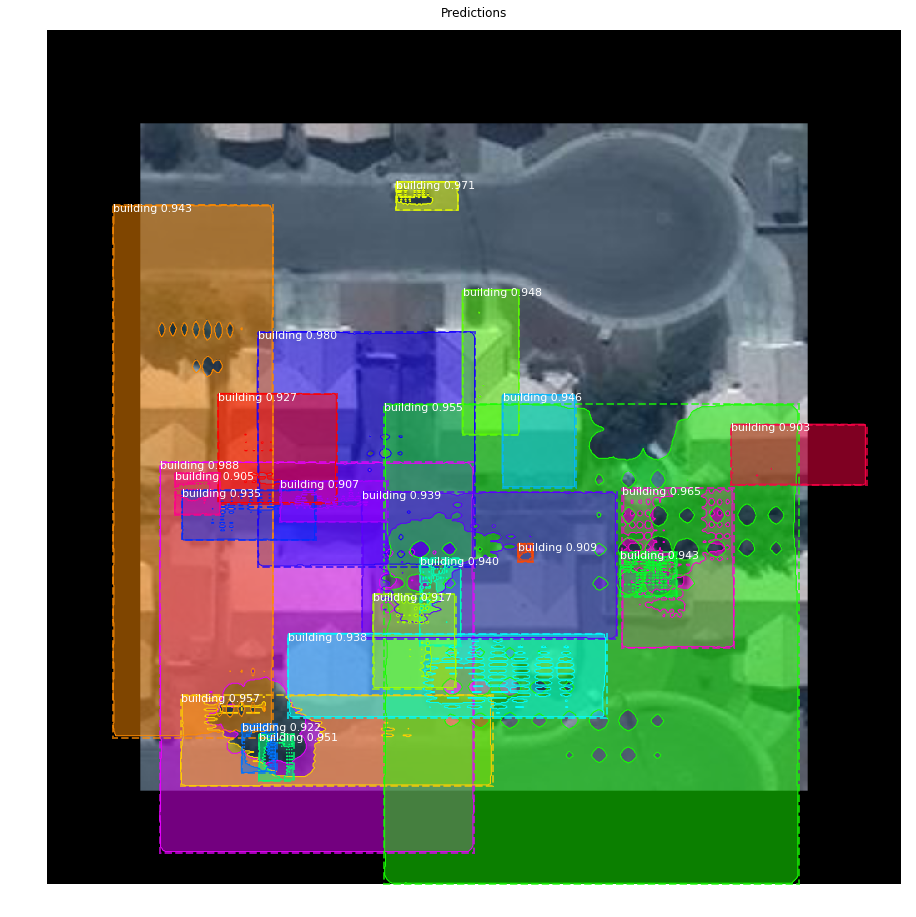

In [51]:
#image_id = random.choice(dataset.image_ids)
image_id = 24
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [12]:
# fresh start

# Training dataset
dataset_train = aerial.AerialDataset()
dataset_train.load_aerial(AERIAL_DIR, "train")
dataset_train.prepare()

dataset_val = aerial.AerialDataset()
dataset_val.load_aerial(AERIAL_DIR, "val")
dataset_val.prepare()

model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='all')

D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\datasets/aerial\train
<bound method Dataset.__init__ of <samples.aerial_building.aerial.AerialDataset object at 0x000002573DAFE240>>
D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\datasets/aerial\val
<bound method Dataset.__init__ of <samples.aerial_building.aerial.AerialDataset object at 0x000002573DB145C0>>

Starting at epoch 0. LR=0.001

Checkpoint Path: D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\logs\aerial20200127T0222\mask_rcnn_aerial_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2

C:\Users\Hamzah\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
idx [False  True  True  True  True  True  True  True  True]
-----
mask [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False 

ERROR:root:Error processing image {'id': '000000084051.jpg', 'source': 'aerial', 'path': 'D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\datasets/aerial\\train\\000000084051.jpg', 'width': 300, 'height': 300, 'polygons': [{'name': 'polygon', 'all_points_x': [0, 0, 0, 0], 'all_points_y': [40.99999999999999, 40.99999999999999, 58.99999999999999, 40.99999999999999]}, {'name': 'polygon', 'all_points_x': [214, 214, 257, 257, 214], 'all_points_y': [72, 28.000000000000004, 28.000000000000007, 72, 72]}, {'name': 'polygon', 'all_points_x': [257, 257, 245, 245, 245, 205, 205, 179, 148, 148, 257], 'all_points_y': [6.55186037543834e-15, 21.000000000000007, 20.000000000000007, 9.000000000000005, 5.000000000000006, 5.0000000000000036, 8.000000000000004, 8.000000000000002, 7, -1.2246467991473532e-16, 6.55186037543834e-15]}, {'name': 'polygon', 'all_points_x': [220, 249, 248, 259, 259, 248, 248, 219, 220], 'all_points_y': [76, 77, 94, 94, 119, 119, 161, 160, 76]}, {'name': 'p

idx [ True  True  True  True  True  True  True  True  True]
-----
mask [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False Fals

ERROR:root:Error processing image {'id': '000000001457.jpg', 'source': 'aerial', 'path': 'D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\datasets/aerial\\train\\000000001457.jpg', 'width': 300, 'height': 300, 'polygons': [{'name': 'polygon', 'all_points_x': [235, 224, 223, 165, 167, 185, 188, 236, 234, 237, 235], 'all_points_y': [153, 152, 160, 152, 124, 126, 92, 98, 133, 134, 153]}, {'name': 'polygon', 'all_points_x': [300, 272, 272, 264, 265, 274, 276, 300, 300], 'all_points_y': [159, 156, 147, 146, 131, 132, 100.99999999999999, 103.99999999999999, 159]}, {'name': 'polygon', 'all_points_x': [300, 273, 277, 300, 300], 'all_points_y': [239, 236, 182, 185, 239]}, {'name': 'polygon', 'all_points_x': [0, 11, 12, 48, 49, 0, 0], 'all_points_y': [270, 270, 278, 277, 300, 300, 270]}, {'name': 'polygon', 'all_points_x': [292, 283, 285, 293, 292], 'all_points_y': [99.99999999999999, 97.99999999999999, 86.99999999999999, 87.99999999999999, 99.99999999999999]}, {'name': 

idx [ True  True  True  True  True  True  True  True  True  True  True  True]
-----
mask [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
 

ERROR:root:Error processing image {'id': '000000081740.jpg', 'source': 'aerial', 'path': 'D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\datasets/aerial\\train\\000000081740.jpg', 'width': 300, 'height': 300, 'polygons': [{'name': 'polygon', 'all_points_x': [117.99999999999999, 125.99999999999999, 157.99999999999997, 150, 117.99999999999999], 'all_points_y': [65, 6, 9, 68, 65]}], 'category_ids': [1]}
Traceback (most recent call last):
  File "D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\mrcnn\model.py", line 1727, in data_generator
    # where we train on a subset of classes and the image doesn't
TypeError: '>' not supported between instances of 'list' and 'int'


idx [ True]
-----
mask [[[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 ...

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]]
-----
class_ids [1]
-----


ERROR:root:Error processing image {'id': '000000191637.jpg', 'source': 'aerial', 'path': 'D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\datasets/aerial\\train\\000000191637.jpg', 'width': 300, 'height': 300, 'polygons': [{'name': 'polygon', 'all_points_x': [188, 191, 190, 249, 250, 267, 293, 294, 269, 270, 194, 193, 190, 188], 'all_points_y': [72, 72, 62, 58.00000000000001, 68, 67.00000000000001, 65.00000000000001, 106.00000000000001, 108.00000000000001, 138, 143, 118, 118, 72]}, {'name': 'polygon', 'all_points_x': [285, 284, 300, 300, 285], 'all_points_y': [300, 282, 283, 300, 300]}, {'name': 'polygon', 'all_points_x': [0, 7, 20, 28, 47, 50, 61, 63, 0, 0], 'all_points_y': [274, 264, 278, 267, 289, 286, 298, 300, 300, 274]}, {'name': 'polygon', 'all_points_x': [128, 127, 130, 130, 147, 147, 153, 152, 165, 165, 180, 180, 192, 192, 201, 201, 128], 'all_points_y': [300, 298, 298, 284, 283, 273, 273, 270, 269, 262, 262, 269, 269, 284, 284, 300, 300]}, {'name': 'p

idx [ True  True  True  True  True  True  True]
-----
mask [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False 

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
####
'''
next steps for 
create dataset - buildings, pools etc.,u7

x,y,z formt mei images
middle east
mapbox


tiles to geojson




'''